In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# -------- Load true classifications --------
true_viral_df = pd.read_csv("200K_virus_reads_chimeric.tsv", sep="\t", header=None,
                            names=["readID", "tag", "chimeric_status", "true_classification"])
master_df = true_viral_df[["readID", "true_classification"]].drop_duplicates()

# -------- Define function to check correct classifications --------
def check_matches(classifier_df, read_col, lineage_col, master_df, colname):
    # Create a dictionary: readID -> lineage
    lineage_map = dict(zip(classifier_df[read_col], classifier_df[lineage_col].fillna("")))
    # Create boolean column: does the lineage contain the true classification?
    master_df[colname] = master_df.apply(
        lambda row: row["true_classification"] in lineage_map.get(row["readID"], ""),
        axis=1
    )
    return master_df

# -------- Load classifier outputs --------
centrifuge_full = pd.read_csv("1st_classification_results/centrifuge_fullDB/full_sim_om_200000.centrifuge_withLineage.out.tsv", sep="\t")
centrifuger_viral = pd.read_csv("1st_classification_results/centrifuger/full_sim_om_200000report_wLineage.tsv", sep="\t")
diamond_full = pd.read_csv("1st_classification_results/diamond-megan_fullDB/full_sim_om_200000_withLineage.out", sep="\t")
diamond_viral = pd.read_csv("1st_classification_results/diamond-megan/full_sim_om_200000_withLineage.out", sep="\t")
kraken_full = pd.read_csv("1st_classification_results/kraken_fullDB/full_sim_om_200000.kraken2_withLineage.out", sep="\t")
kraken_viral = pd.read_csv("1st_classification_results/kraken2/full_sim_om_200000.kraken2_withLineage.out", sep="\t")

# -------- Annotate matches --------
master_df = check_matches(centrifuge_full, "readID", "lineage", master_df, "centrifuge_fullDB")
master_df = check_matches(centrifuger_viral, "readID", "lineage", master_df, "centrifuger_viralDB")
master_df = check_matches(diamond_full, "readID", "lineage", master_df, "diamond_fullDB")
master_df = check_matches(diamond_viral, "readID", "lineage", master_df, "diamond_viralDB")
master_df = check_matches(kraken_full, "readID", "lineage", master_df, "kraken2_fullDB")
master_df = check_matches(kraken_viral, "readID", "lineage", master_df, "kraken2_viralDB")

# -------- Save --------
master_df.to_csv("master_classification_comparison.tsv", sep="\t", index=False)

print(master_df)


/var/folders/_p/cpx_rt5n0bl5d6v6kpzddqrc0000gn/T/ipykernel_99819/316161983.py:25: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  centrifuge_full = pd.read_csv("1st_classification_results/centrifuge_fullDB/full_sim_om_200000.centrifuge_withLineage.out.tsv", sep="\t")


                                                 readID  \
0     Porcine_parvovirus-NC-001718_2387;gap_66;Segat...   
1     Porcine_parvovirus-NC-001718_2387;gap_66;Segat...   
2     Swine_Influenza_A_Virus_(IAV-S)-NC-026436_886;...   
3     Betacoronavirus_1-NC-006213_23437;gap_0;Dorea_...   
4     Porcine_parvovirus-NC-001718_959;gap_48;Strept...   
...                                                 ...   
3083  Megasphaera_elsdenii-NZ-AP031433_1676761;gap_0...   
3084  Porcine_parvovirus-NC-001718_2564;gap_0;Strept...   
3085  Swine_Influenza_A_Virus_(IAV-S)-NC-026437_1170...   
3086  Swine_Influenza_A_Virus_(IAV-S)-NC-026437_1170...   
3087  Suid_betaherpesvirus_2-NC-022233_9524_aligned_...   

         true_classification  centrifuge_fullDB  centrifuger_viralDB  \
0         Porcine parvovirus              False                False   
1       Suid betaherpesvirus               True                 True   
2          Influenza A virus               True                 True   
3  

In [10]:
import pandas as pd
import os

# Set working directory
os.chdir("/Users/jazminvaleriano/Library/Mobile Documents/com~apple~CloudDocs/03 UNIFR MS/00. SP25/00.MASTER_THESIS/FINAL_CHAPTERS/07_Virus_mNGS_validation_CM_SIM")

# Load ground truth viral read IDs
true_viral_df = pd.read_csv("200K_virus_reads_chimeric.tsv", sep="\t", header=None,
                            names=["readID", "tag", "chimeric_status", "true_classification"])
viral_check_df = true_viral_df[["readID"]].drop_duplicates()

# Function to annotate whether the read was classified as viral by the tool
def check_viral_classification(df_classifier, read_col, lineage_col, main_df, new_col):
    viral_map = df_classifier[df_classifier[lineage_col].str.contains("Viruses", case=False, na=False)]
    viral_ids = set(viral_map[read_col])
    main_df[new_col] = main_df["readID"].isin(viral_ids)
    return main_df

# Load classifier outputs
centrifuge_full = pd.read_csv("1st_classification_results/centrifuge_fullDB/full_sim_om_200000.centrifuge_withLineage.out.tsv", sep="\t")
centrifuger_viral = pd.read_csv("1st_classification_results/centrifuger/full_sim_om_200000report_wLineage.tsv", sep="\t")
diamond_full = pd.read_csv("1st_classification_results/diamond-megan_fullDB/full_sim_om_200000_withLineage.out", sep="\t")
diamond_viral = pd.read_csv("1st_classification_results/diamond-megan/full_sim_om_200000_withLineage.out", sep="\t")
kraken_full = pd.read_csv("1st_classification_results/kraken_fullDB/full_sim_om_200000.kraken2_withLineage.out", sep="\t")
kraken_viral = pd.read_csv("1st_classification_results/kraken2/full_sim_om_200000.kraken2_withLineage.out", sep="\t")

# Annotate each tool's viral assignments
viral_check_df = check_viral_classification(centrifuge_full, "readID", "lineage", viral_check_df, "centrifuge_fullDB")
viral_check_df = check_viral_classification(centrifuger_viral, "readID", "lineage", viral_check_df, "centrifuger_viralDB")
viral_check_df = check_viral_classification(diamond_full, "readID", "lineage", viral_check_df, "diamond_fullDB")
viral_check_df = check_viral_classification(diamond_viral, "readID", "lineage", viral_check_df, "diamond_viralDB")
viral_check_df = check_viral_classification(kraken_full, "readID", "lineage", viral_check_df, "kraken2_fullDB")
viral_check_df = check_viral_classification(kraken_viral, "readID", "lineage", viral_check_df, "kraken2_viralDB")

# Save and review
viral_check_df.to_csv("master_classified_as_viral.tsv", sep="\t", index=False)
viral_check_df

/var/folders/_p/cpx_rt5n0bl5d6v6kpzddqrc0000gn/T/ipykernel_99819/3217073292.py:20: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  centrifuge_full = pd.read_csv("1st_classification_results/centrifuge_fullDB/full_sim_om_200000.centrifuge_withLineage.out.tsv", sep="\t")


,readID,centrifuge_fullDB,centrifuger_viralDB,diamond_fullDB,diamond_viralDB,kraken2_fullDB,kraken2_viralDB
0,Porcine_parvovirus-NC-001718_2387;gap_66;Segat...,True,True,False,True,True,True
2,Swine_Influenza_A_Virus_(IAV-S)-NC-026436_886;...,True,True,False,True,True,True
3,Betacoronavirus_1-NC-006213_23437;gap_0;Dorea_...,True,True,False,True,False,True
4,Porcine_parvovirus-NC-001718_959;gap_48;Strept...,True,True,False,True,False,True
5,Streptococcus_acidominimus-NZ-CAKOCW010000052_...,True,True,True,True,False,True
...,...,...,...,...,...,...,...
3081,Streptococcus_acidominimus-NZ-CAKOCW010000002_...,True,True,True,True,True,True
3082,Megasphaera_elsdenii-NZ-AP031433_1676761;gap_0...,False,True,True,True,False,True
3084,Porcine_parvovirus-NC-001718_2564;gap_0;Strept...,True,True,True,True,False,True
3085,Swine_Influenza_A_Virus_(IAV-S)-NC-026437_1170...,True,True,True,True,True,True


                      Tool  Viral Reads  Correctly Classified  \
0    Centrifuger (ViralDB)         4432                  2877   
1  Diamond-MEGAN (ViralDB)         6685                  2200   
2        Kraken2 (ViralDB)         3661                  2878   
3      Centrifuge (FullDB)         2722                  2297   
4   Diamond-MEGAN (FullDB)         1914                  1453   
5         Kraken2 (FullDB)         2006                  1974   

   Incorrectly Classified as Viral  Correctly Viral  Wrong Virus  
0                             1543             2889           12  
1                             4067             2618          418  
2                              782             2879            1  
3                              261             2461          164  
4                              167             1747          294  
5                               32             1974            0  


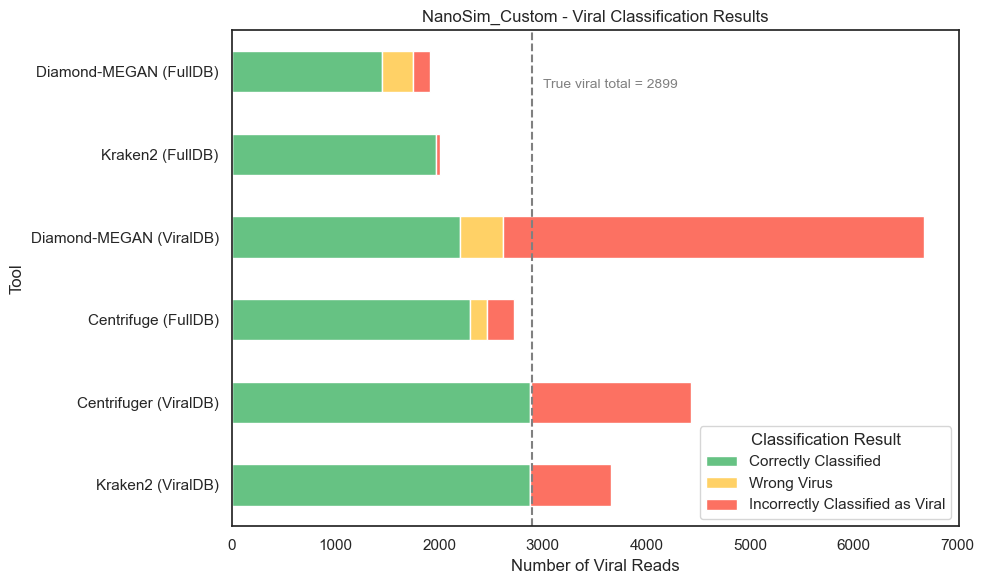

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Load true viral classification and the tool-based "classified as viral" indicators ----
master_df = pd.read_csv("master_classification_comparison.tsv", sep="\t")
classified_as_viral_df = pd.read_csv("master_classified_as_viral.tsv", sep="\t")
truth_reads = set(master_df['readID'])

# ---- Define input files and pretty labels ----
tool_files = {
    'centrifuger_viralDB': "1st_classification_results/centrifuger/full_sim_om_200000report_wLineage.tsv",
    'diamond_viralDB': "1st_classification_results/diamond-megan/full_sim_om_200000_withLineage.out",
    'kraken2_viralDB': "1st_classification_results/kraken2/full_sim_om_200000.kraken2_withLineage.out",
    'centrifuge_fullDB': "1st_classification_results/centrifuge_fullDB/full_sim_om_200000.centrifuge_withLineage.out.tsv",
    'diamond_fullDB': "1st_classification_results/diamond-megan_fullDB/full_sim_om_200000_withLineage.out",
    'kraken2_fullDB': "1st_classification_results/kraken_fullDB/full_sim_om_200000.kraken2_withLineage.out"
}

tool_labels = {
    'centrifuger_viralDB': 'Centrifuger (ViralDB)',
    'diamond_viralDB': 'Diamond-MEGAN (ViralDB)',
    'kraken2_viralDB': 'Kraken2 (ViralDB)',
    'centrifuge_fullDB': 'Centrifuge (FullDB)',
    'diamond_fullDB': 'Diamond-MEGAN (FullDB)',
    'kraken2_fullDB': 'Kraken2 (FullDB)'
}

# ---- Step 1: Count total viral reads per tool ----
viral_counts = []
false_positives = []

for tool, path in tool_files.items():
    df = pd.read_csv(path, sep="\t", header=None, names=["lineage", "taxID", "readID"], usecols=[0, 1, 2])
    viral_df = df[df['lineage'].str.contains("Viruses", case=False, na=False)]
    viral_read_ids = set(viral_df['readID'])
    
    viral_counts.append({
        'Tool': tool_labels[tool],
        'Viral Reads': len(viral_read_ids)
    })
    
    false_positives.append({
        'Tool': tool_labels[tool],
        'Incorrectly Classified as Viral': len(viral_read_ids - truth_reads)
    })

viral_reads_df = pd.DataFrame(viral_counts)
false_pos_df = pd.DataFrame(false_positives)

# ---- Step 2: Count correct strain-level classifications ----
correct_counts = []
for tool_key, label in tool_labels.items():
    correct_counts.append({
        'Tool': label,
        'Correctly Classified': master_df[tool_key].sum()
    })
correct_df = pd.DataFrame(correct_counts)

# ---- Step 3: Count true viral reads marked as viral (regardless of classification precision) ----
correctly_viral_counts = []
for tool_key, label in tool_labels.items():
    correctly_viral_counts.append({
        'Tool': label,
        'Correctly Viral': classified_as_viral_df[tool_key].sum()
    })
correctly_viral_df = pd.DataFrame(correctly_viral_counts)

# ---- Step 4: Merge all information ----
summary_df = (
    viral_reads_df
    .merge(correct_df, on="Tool")
    .merge(false_pos_df, on="Tool")
    .merge(correctly_viral_df, on="Tool")
)

# ---- Save summary ----
summary_df.to_csv("viral_reads_and_classification_summary.tsv", sep="\t", index=False)
summary_df['Wrong Virus'] = summary_df['Correctly Viral'] - summary_df['Correctly Classified']

print(summary_df)

# ---- Plotting ----
plot_df = summary_df[['Tool', 'Correctly Classified', 'Wrong Virus', 'Incorrectly Classified as Viral']]
plot_df.set_index('Tool', inplace=True)
plot_df = plot_df.sort_values(by=['Correctly Classified', 'Wrong Virus'], ascending=False)

# Ground truth total viral reads
true_total = len(truth_reads)

sns.set(style="white")
colors = ["#66c283", "#ffd166", "#fc7162"]  # green, yellow, red

ax = plot_df.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=colors
)

# Add dashed vertical line for ground truth
plt.axvline(true_total, linestyle='--', color='gray', linewidth=1.5)
plt.text(true_total + 100, len(plot_df) - 1.2, f"True viral total = {true_total}", color='gray', fontsize=10)

plt.xlabel('Number of Viral Reads')
plt.title('NanoSim_Custom - Viral Classification Results')
plt.legend(loc='lower right', title='Classification Result')
plt.tight_layout()
plt.savefig("viral_reads_correct_wrongspecies_falsepos_groundtruth.png", dpi=300)
plt.show()
